In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nhl-game-data-20132021/teamInfo.csv
/kaggle/input/nhl-game-data-20132021/playsStats.csv
/kaggle/input/nhl-game-data-20132021/gameStats.csv
/kaggle/input/nhl-game-data-20132021/gamePlayerStats.csv
/kaggle/input/nhl-game-data-20132021/penalties.csv
/kaggle/input/nhl-game-data-20132021/gameGoalieStats.csv
/kaggle/input/nhl-game-data-20132021/gameInfo.csv
/kaggle/input/nhl-game-data-20132021/goals.csv
/kaggle/input/nhl-game-data-20132021/playPlayersStats.csv
/kaggle/input/nhl-game-data-20132021/playerInfo.csv
/kaggle/input/nhl-game-data-20132021/shifts.csv
/kaggle/input/nhl-game-data-20132021/gameOfficialsInfo.csv


In [2]:
teamInfoDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/teamInfo.csv')
playsStatsDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/playsStats.csv')
gameStatsDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/gameStats.csv')
gamePlayerStatsDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/gamePlayerStats.csv')
penaltiesDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/penalties.csv')
gameGoalieStatsDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/gameGoalieStats.csv')
gameInfoDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/gameInfo.csv')
goalsDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/goals.csv')
playPlayersStatsDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/playPlayersStats.csv')
playerInfoDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/playerInfo.csv')
shiftsDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/shifts.csv')
gameOfficialsInfoDf = pd.read_csv('/kaggle/input/nhl-game-data-20132021/gameOfficialsInfo.csv')

dfs = [teamInfoDf, playsStatsDf, gameStatsDf, gamePlayerStatsDf, penaltiesDf, gameGoalieStatsDf, gameInfoDf, goalsDf, playPlayersStatsDf, playerInfoDf, shiftsDf, gameOfficialsInfoDf]

for df in dfs:
    print(df.describe())
    print("-------------------------------------------------------------------------")


              ID
count  32.000000
mean   20.031250
std    15.260077
min     1.000000
25%     8.750000
50%    17.500000
75%    25.250000
max    55.000000
-------------------------------------------------------------------------
             gameId     teamIdFor  teamIdAgainst             x             y  \
count  3.428494e+06  2.764275e+06   2.764275e+06  2.758709e+06  2.758724e+06   
mean   6.032656e+02  1.838551e+01   1.834891e+01  6.451858e-02 -1.471224e-01   
std    3.544503e+02  1.330004e+01   1.331773e+01  6.427040e+01  2.289642e+01   
min    1.000000e+00  1.000000e+00   1.000000e+00 -1.000000e+02 -4.200000e+01   
25%    2.980000e+02  8.000000e+00   8.000000e+00 -6.900000e+01 -2.200000e+01   
50%    5.970000e+02  1.700000e+01   1.700000e+01  0.000000e+00  0.000000e+00   
75%    8.980000e+02  2.400000e+01   2.400000e+01  6.900000e+01  2.200000e+01   
max    1.312000e+03  5.500000e+01   5.500000e+01  1.000000e+02  4.200000e+01   

             period    periodTime  periodTimeRemaini

In [3]:
print(playPlayersStatsDf[playPlayersStatsDf['playerType'] == 'Winner'])

                 playId    id  playerId playerType
0          2013020001_3     1   8475098     Winner
9          2013020001_9     1   8469508     Winner
20        2013020001_16     1   8469521     Winner
24        2013020001_19     1   8469521     Winner
28        2013020001_22     1   8475098     Winner
...                 ...   ...       ...        ...
5071007  2021021312_231  1312   8482665     Winner
5071012  2021021312_235  1312   8476826     Winner
5071026  2021021312_243  1312   8476826     Winner
5071030  2021021312_246  1312   8476826     Winner
5071048  2021021312_255  1312   8479987     Winner

[634231 rows x 4 columns]


In [4]:
print(playerInfoDf[playerInfoDf['weight'].isna() == True])
#print(playerInfoDf.iloc[1654, :])

#print(playerInfoDf)

           ID       fullName nationality position   birthdate height  weight  \
1654  8479138   Scott Foster         NaN        G  1982-01-17    NaN     NaN   
1825  8481481  Blake Lizotte         NaN        C  1997-12-13    NaN     NaN   

     shootsCatches  
1654           NaN  
1825             L  


In [5]:
#print(playsStatsDf['event'].unique())
shots = playsStatsDf[playsStatsDf['event'] == 'Shot']
goals = playsStatsDf[playsStatsDf['event'] == 'Goal']
blocked = playsStatsDf[playsStatsDf['event'] == 'Blocked Shot']
missed = playsStatsDf[playsStatsDf['event'] == 'Missed Shot']

#total = len(shots) + len(goals) + len(blocked) + len(missed)
#print(total)

#print(len(shots.index.unique().tolist()))
#print(len(shots))
#print(len(goals) + len(blocked) + len(missed))
#print(len(shots.append(goals).append(blocked).append(missed).index.unique().tolist()))


print(len(shots))
print(len(goals))
print(len(blocked)) 
print(len(missed))

allShots = shots.append(goals).append(blocked).append(missed)

print(len(allShots))

601961
63300
301443
252227
1218931


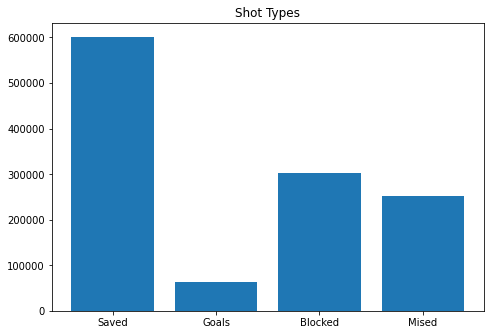

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

shots = len(playsStatsDf[playsStatsDf['event'] == 'Shot'])
goals = len(playsStatsDf[playsStatsDf['event'] == 'Goal'])
blocked = len(playsStatsDf[playsStatsDf['event'] == 'Blocked Shot'])
missed = len(playsStatsDf[playsStatsDf['event'] == 'Missed Shot'])

allShots = [shots, goals, blocked, missed]
shotTypes = ['Saved', 'Goals', 'Blocked', 'Mised']

ax.bar(shotTypes, allShots)
ax.set_title('Shot Types')
plt.savefig('shotTypes.jpg', bbox_inches='tight')
plt.show()



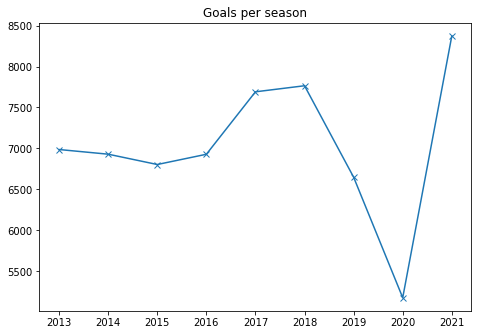

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

numGoals = []
seasons = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

for season in seasons:
    numGoals.append(len(goalsDf[goalsDf['playId'].str[:4] == season]))
    

ax.plot(seasons, numGoals, 'x-')
ax.set_title('Goals per season')
plt.savefig('seasonGoals.jpg', bbox_inches='tight')
plt.show()


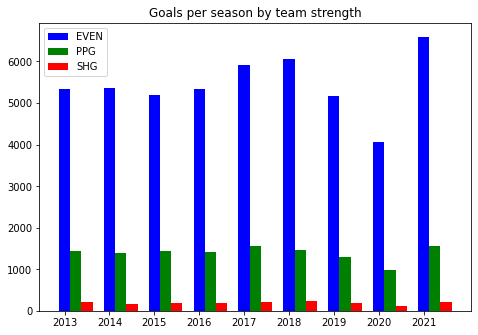

In [8]:
import numpy as np

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

numGoals = [[], [], []]
seasons = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

for season in seasons:
    numGoals[0].append(len(goalsDf[(goalsDf['playId'].str[:4] == season) & (goalsDf['strength'] == 'EVEN')]))
    numGoals[1].append(len(goalsDf[(goalsDf['playId'].str[:4] == season) & (goalsDf['strength'] == 'PPG')]))
    numGoals[2].append(len(goalsDf[(goalsDf['playId'].str[:4] == season) & (goalsDf['strength'] == 'SHG')]))

#print(goalsDf[(goalsDf['playId'].str[:4] == '2013') & (goalsDf['strength'] == 'EVEN')])
#print(goalsDf[(goalsDf['playId'].str[:4] == '2014') & (goalsDf['strength'] == 'EVEN')])

#print(numGoals)

X = np.arange(len(seasons))
ax.bar(X + 0.00, numGoals[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, numGoals[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, numGoals[2], color = 'r', width = 0.25)
ax.set_title('Goals per season by team strength')
ax.legend(labels=['EVEN', 'PPG', 'SHG'])
ax.set_xticks(X, seasons)
plt.savefig('seasonGoalsStrength.jpg', bbox_inches='tight')
plt.show()



['Wrist Shot' 'Slap Shot' 'Backhand' nan 'Snap Shot' 'Tip-In' 'Deflected'
 'Wrap-around']


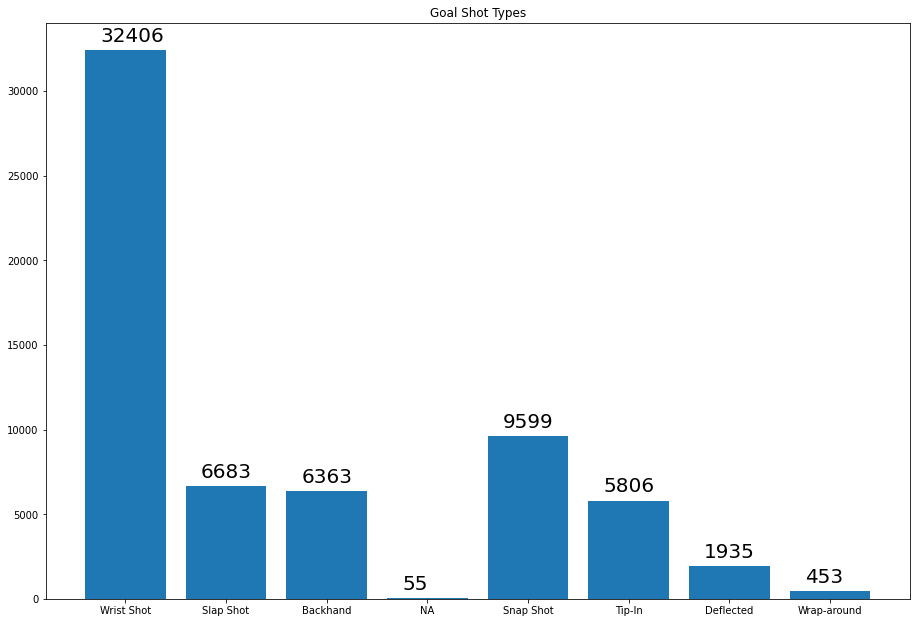

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

goals = playsStatsDf[playsStatsDf['event'] == 'Goal']

print(goals['secondaryType'].unique())
#print(goals[goals['secondaryType'].isna() == True])

goalShotTypes = ['Wrist Shot', 'Slap Shot', 'Backhand', 'NA', 'Snap Shot', 'Tip-In', 'Deflected', 'Wrap-around']
numGoals = []
for shot in goalShotTypes:
    if shot == 'NA':
        numGoals.append(len(goals[goals['secondaryType'].isna() == True]))
        
    else:
        numGoals.append(len(goals[goals['secondaryType'] == shot]))
        
        
ax.bar(goalShotTypes, numGoals)
ax.set_title('Goal Shot Types')
for index,data in enumerate(numGoals):
    plt.text(x=index-0.25 , y =data+500 , s=f"{data}", fontdict=dict(fontsize=20))
plt.savefig('goalShotTypes.jpg', bbox_inches='tight')
plt.show()

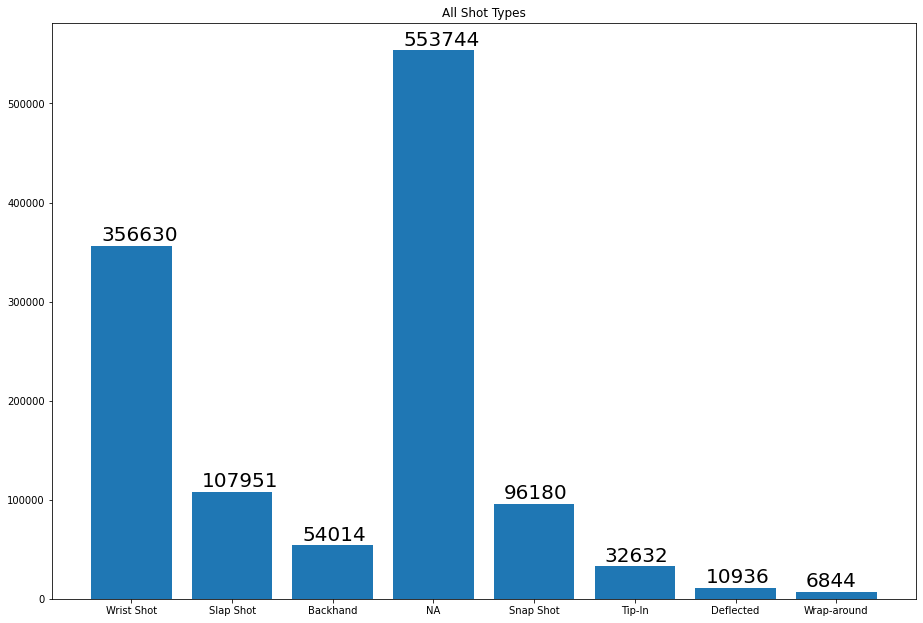

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

shots = playsStatsDf[playsStatsDf['event'] == 'Shot']
goals = playsStatsDf[playsStatsDf['event'] == 'Goal']
blocked = playsStatsDf[playsStatsDf['event'] == 'Blocked Shot']
missed = playsStatsDf[playsStatsDf['event'] == 'Missed Shot']

allShots = shots.append(goals).append(blocked).append(missed)

#print(allShots['secondaryType'].unique())
#print(allShots[allShots['secondaryType'].isna() == True])

shotTypes = ['Wrist Shot', 'Slap Shot', 'Backhand', 'NA', 'Snap Shot', 'Tip-In', 'Deflected', 'Wrap-around']
numShots = []
for shot in shotTypes:
    if shot == 'NA':
        numShots.append(len(allShots[allShots['secondaryType'].isna() == True]))
        
    else:
        numShots.append(len(allShots[allShots['secondaryType'] == shot]))
        
        
ax.bar(shotTypes, numShots)
ax.set_title('All Shot Types')
for index,data in enumerate(numShots):
    plt.text(x=index-0.3 , y =data+5000 , s=f"{data}", fontdict=dict(fontsize=20))
plt.savefig('allShotTypes.jpg', bbox_inches='tight')
plt.show()

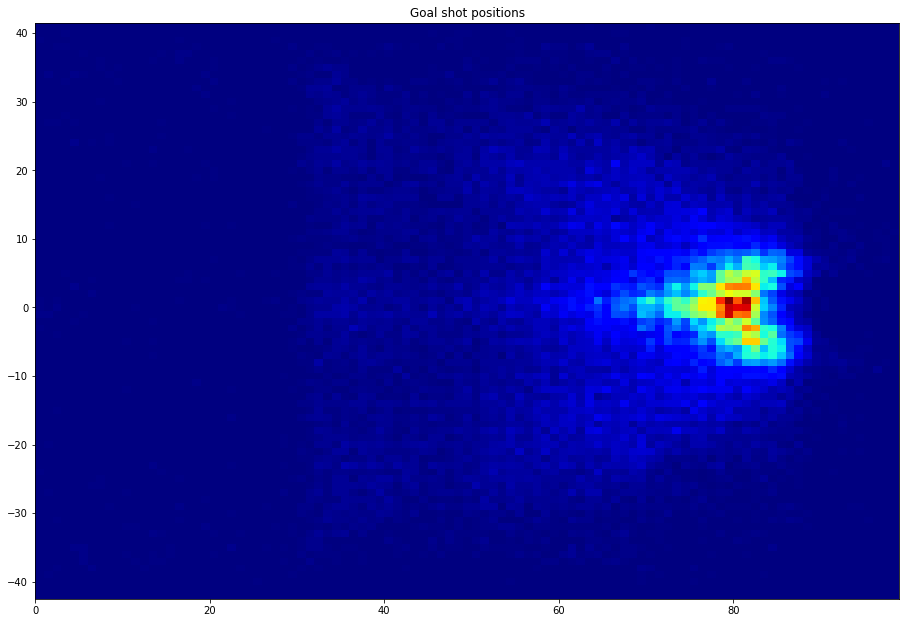

In [11]:
validGoals = goals[(goals['x'].isna() == False) & (goals['y'].isna() == False)]
validGoals = validGoals[['x', 'y']]
#print(validGoals)
#print(goals[goals['x', 'y'].isna() == False])

m = validGoals['x'] >= 0
standardisedGoals = validGoals.where(m, -validGoals)

validGoals['x'] = standardisedGoals['x']
#print(validGoals)

#print(validGoals)

x = np.array(validGoals['x'])
y = np.array(validGoals['y'])

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.hist2d(x,y, bins=[np.arange(0,100,1),np.arange(-42.5,42.5,1)], cmap=plt.cm.jet)
ax.set_title('Goal shot positions')
plt.savefig('goalShotPositions.jpg', bbox_inches='tight')
plt.show()




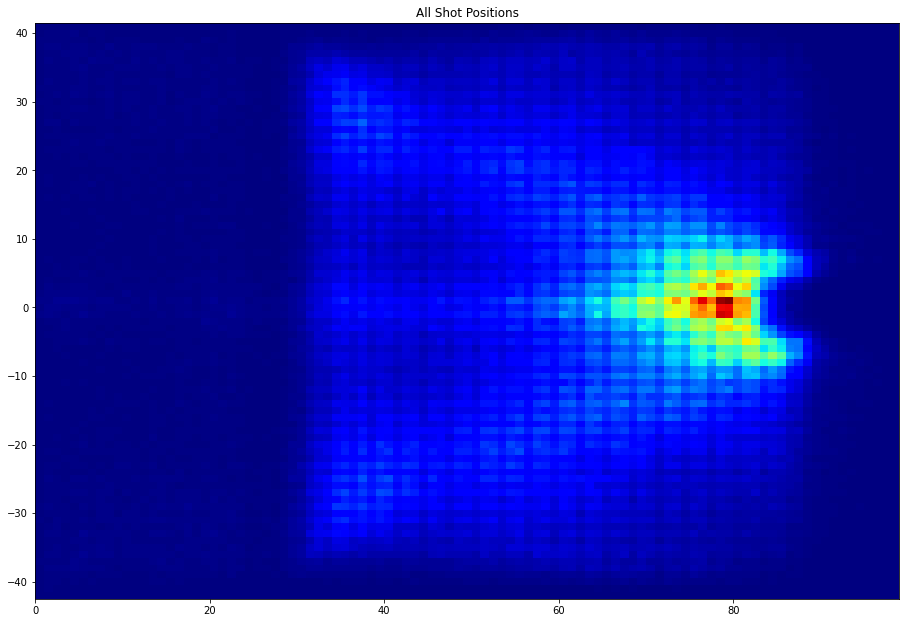

In [12]:
validShots = allShots[(allShots['x'].isna() == False) & (allShots['y'].isna() == False)]
validShots = validShots[['x', 'y']]
#print(validGoals)
#print(goals[goals['x', 'y'].isna() == False])

m = validShots['x'] >= 0
standardisedShots = validShots.where(m, -validShots)

validShots['x'] = standardisedShots['x']
#print(validGoals)

#print(validGoals)

x = np.array(validShots['x'])
y = np.array(validShots['y'])

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.hist2d(x,y, bins=[np.arange(0,100,1),np.arange(-42.5,42.5,1)], cmap=plt.cm.jet)
ax.set_title('All Shot Positions')
#plt.savefig('allShotPositions.jpg', bbox_inches='tight')
plt.show()

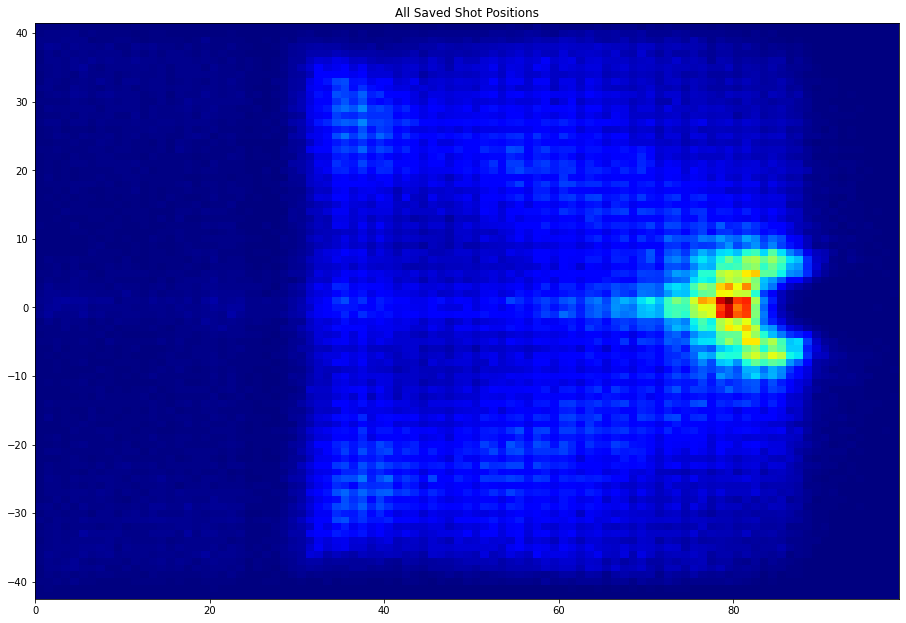

In [13]:
validSaves = shots[(shots['x'].isna() == False) & (shots['y'].isna() == False)]
validSaves = validSaves[['x', 'y']]
#print(validGoals)
#print(goals[goals['x', 'y'].isna() == False])

m = validSaves['x'] >= 0
standardisedSaves = validSaves.where(m, -validSaves)

validSaves['x'] = standardisedSaves['x']
#print(validGoals)

#print(validGoals)

x = np.array(validSaves['x'])
y = np.array(validSaves['y'])

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.hist2d(x,y, bins=[np.arange(0,100,1),np.arange(-42.5,42.5,1)], cmap=plt.cm.jet)
ax.set_title('All Saved Shot Positions')
plt.savefig('allSaveShotPositions.jpg', bbox_inches='tight')
plt.show()

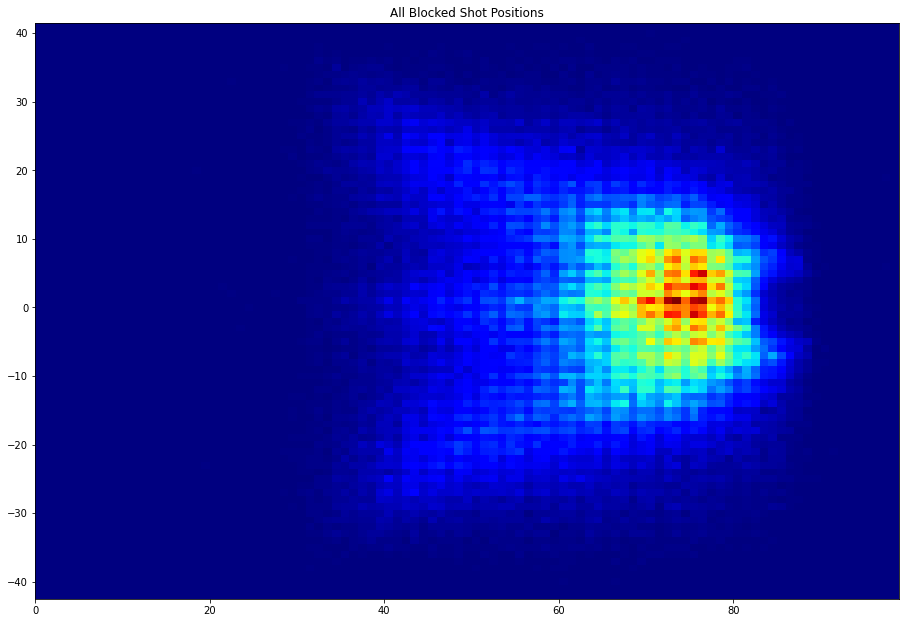

In [14]:
validBlocks = blocked[(blocked['x'].isna() == False) & (blocked['y'].isna() == False)]
validBlocks = validBlocks[['x', 'y']]
#print(validGoals)
#print(goals[goals['x', 'y'].isna() == False])

m = validBlocks['x'] >= 0
standardisedBlocks = validBlocks.where(m, -validBlocks)

validBlocks['x'] = standardisedBlocks['x']
#print(validGoals)

#print(validGoals)

x = np.array(validBlocks['x'])
y = np.array(validBlocks['y'])

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.hist2d(x,y, bins=[np.arange(0,100,1),np.arange(-42.5,42.5,1)], cmap=plt.cm.jet)
ax.set_title('All Blocked Shot Positions')
plt.savefig('allBlockedShotPositions.jpg', bbox_inches='tight')
plt.show()

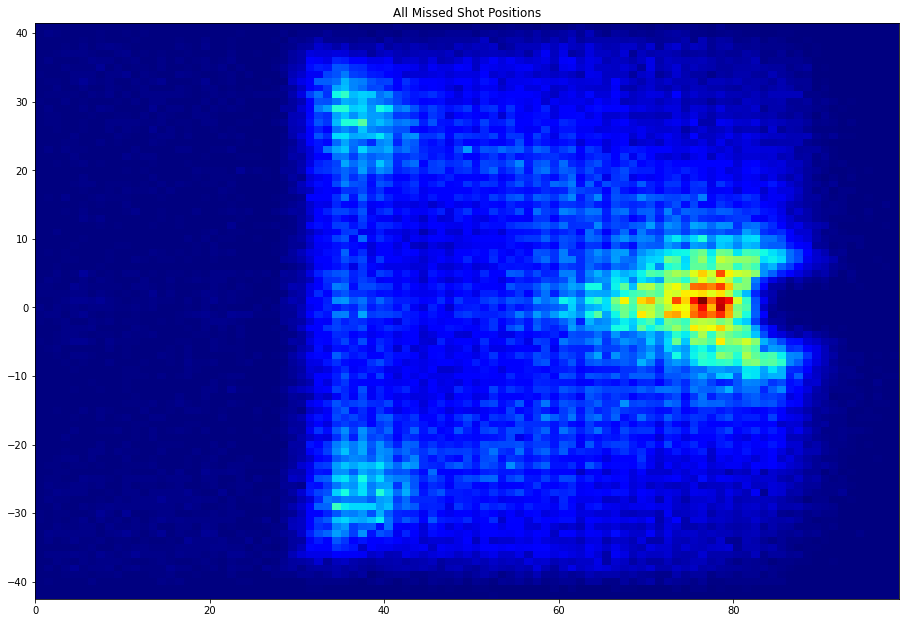

In [15]:
validMiss = missed[(missed['x'].isna() == False) & (missed['y'].isna() == False)]
validMiss = validMiss[['x', 'y']]
#print(validGoals)
#print(goals[goals['x', 'y'].isna() == False])

m = validMiss['x'] >= 0
standardisedMiss = validMiss.where(m, -validMiss)

validMiss['x'] = standardisedMiss['x']
#print(validGoals)

#print(validGoals)

x = np.array(validMiss['x'])
y = np.array(validMiss['y'])

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.hist2d(x,y, bins=[np.arange(0,100,1),np.arange(-42.5,42.5,1)], cmap=plt.cm.jet)
ax.set_title('All Missed Shot Positions')
plt.savefig('allMissedShotPositions.jpg', bbox_inches='tight')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


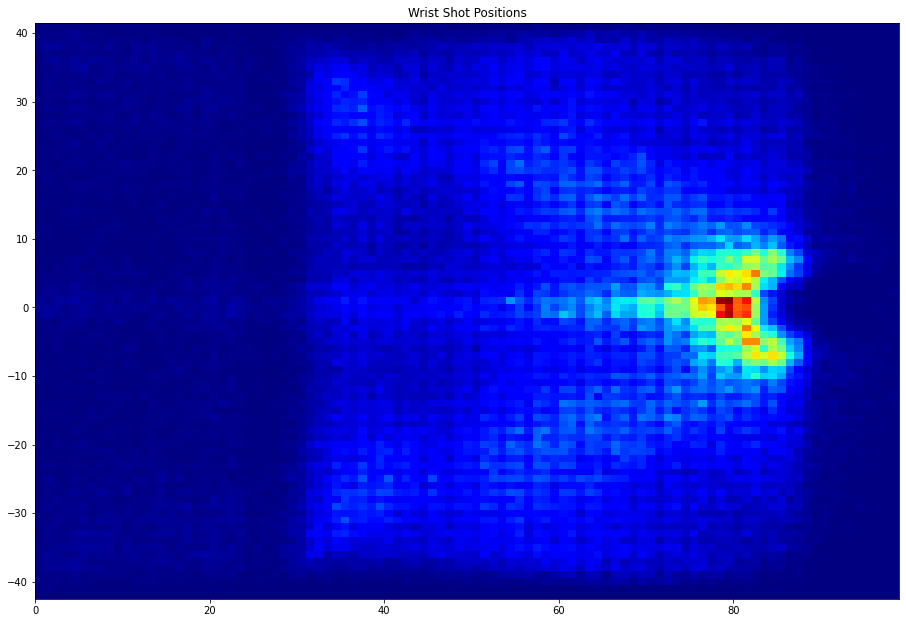

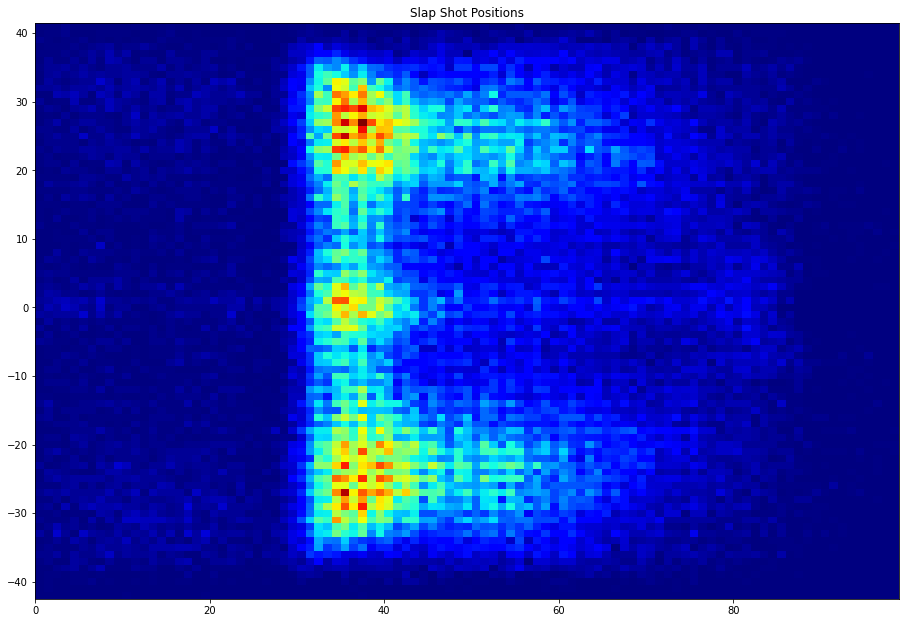

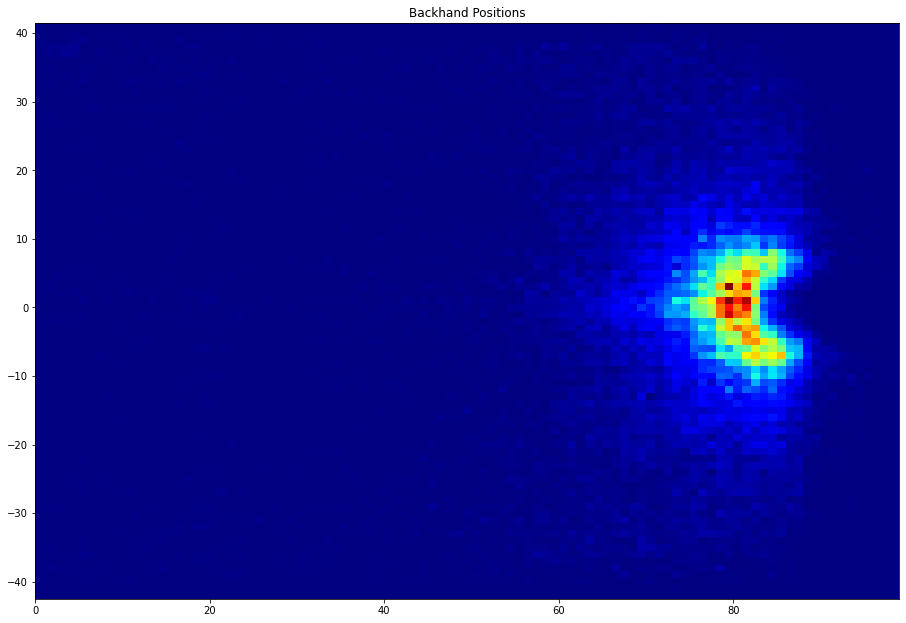

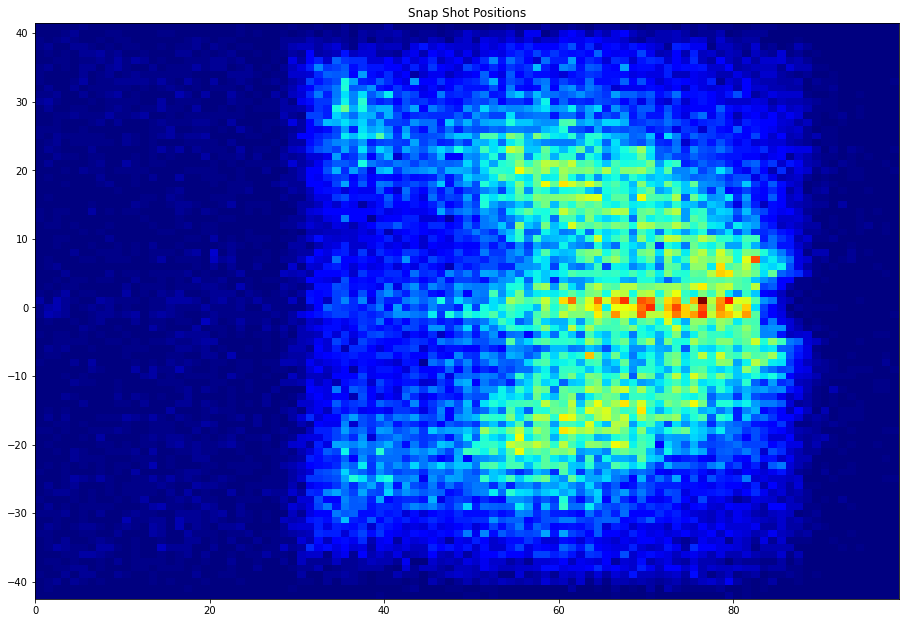

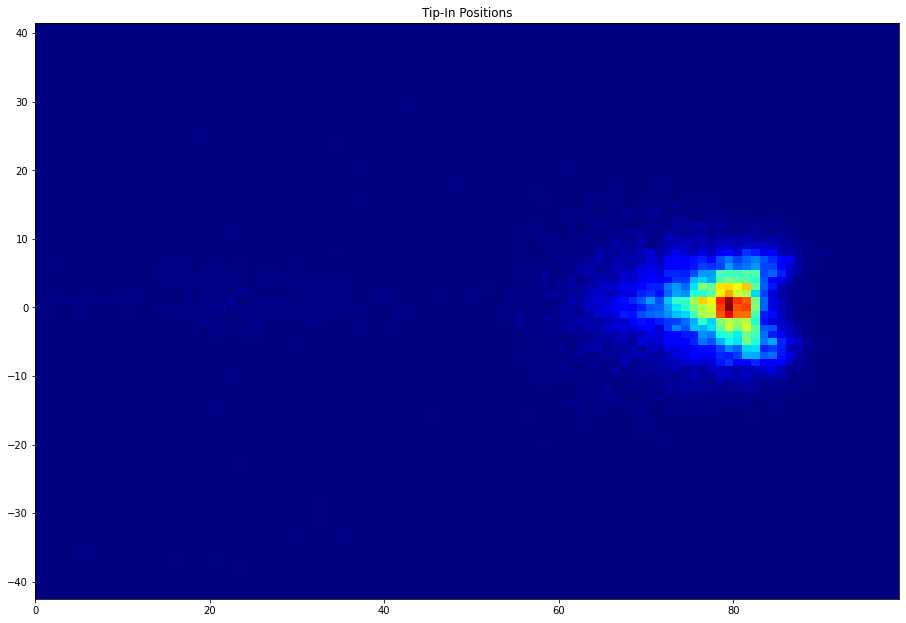

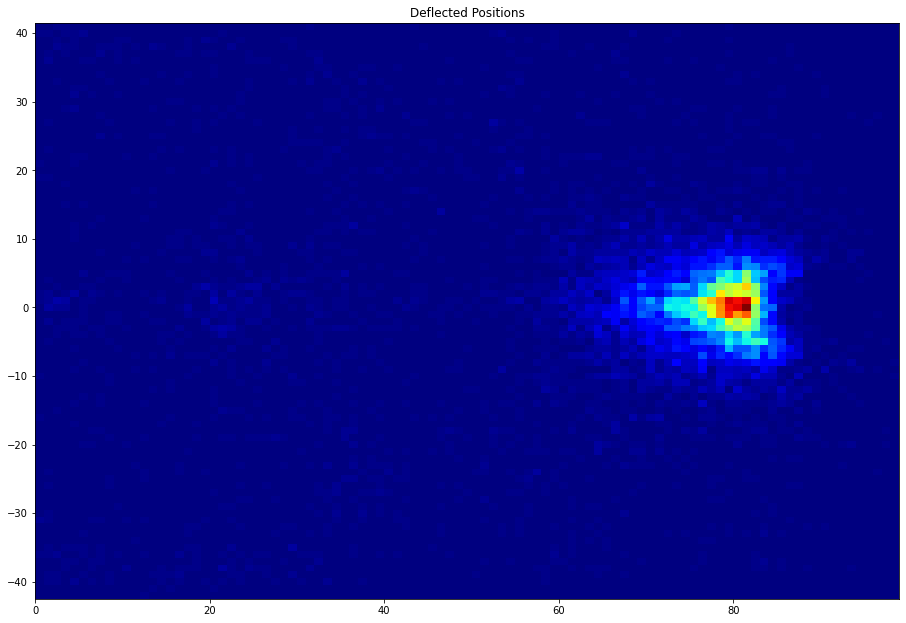

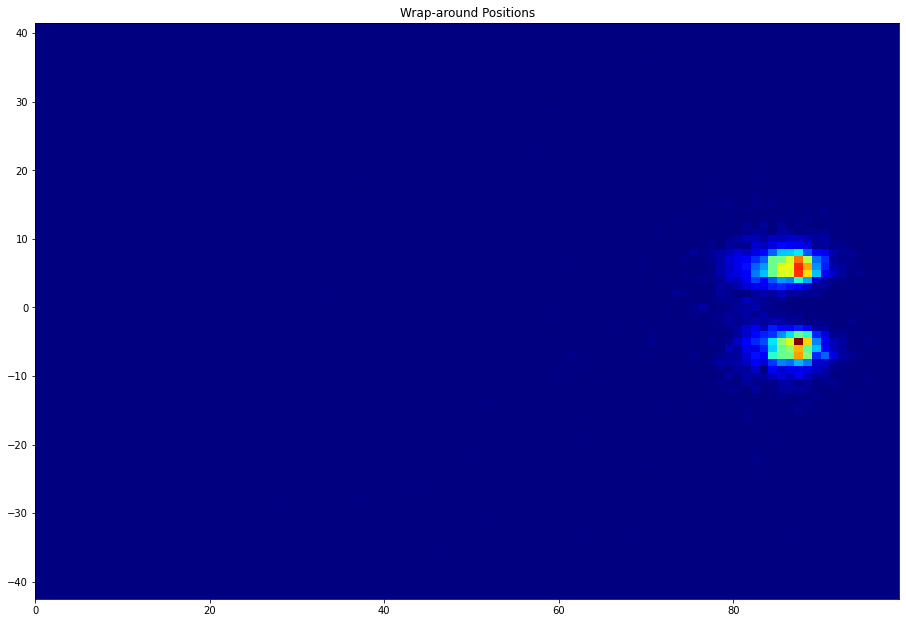

In [16]:
#print(allShots)
validShots = allShots[(allShots['x'].isna() == False) & (allShots['y'].isna() == False) & (allShots['secondaryType'].isna() == False)]
validShotCoords = validShots[['x', 'y']]
#print(validShots)
#print(goals[goals['x', 'y'].isna() == False])

m = validShotCoords['x'] >= 0
standardisedShots = validShotCoords.where(m, -validShotCoords)

validShots['x'] = standardisedShots['x']
#print(validShots)

#print(validGoals)
shotTypes = ['Wrist Shot', 'Slap Shot', 'Backhand', 'Snap Shot', 'Tip-In', 'Deflected', 'Wrap-around']
for shot in shotTypes:     
    examples = validShots[validShots['secondaryType'] == shot]

    x = np.array(examples['x'])
    y = np.array(examples['y'])

    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    ax.hist2d(x,y, bins=[np.arange(0,100,1),np.arange(-42.5,42.5,1)], cmap=plt.cm.jet)
    ax.set_title(shot + ' Positions')
    plt.savefig(shot + 'Positions.jpg', bbox_inches='tight')
    plt.show()


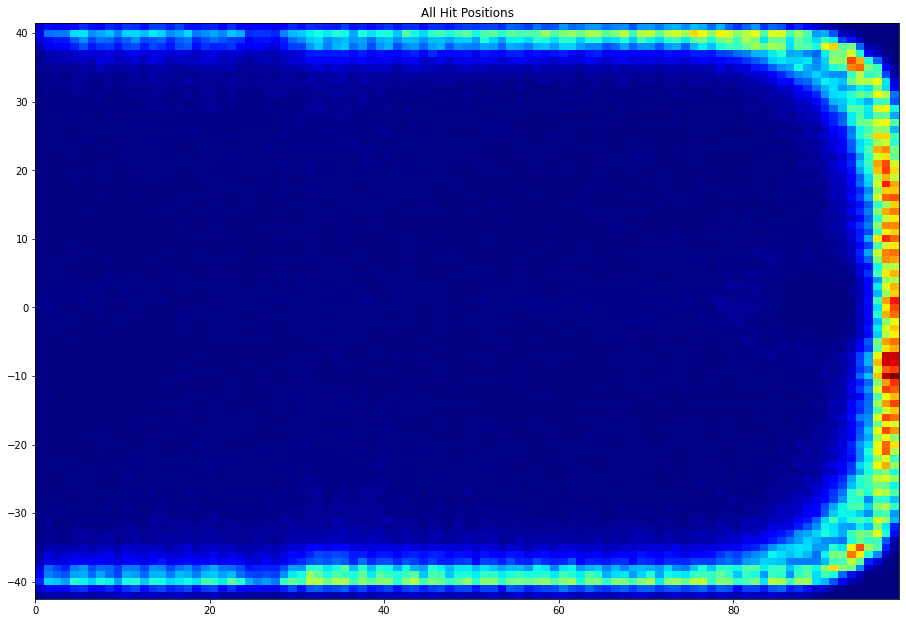

In [17]:
validHit = playsStatsDf[(playsStatsDf['event'] == 'Hit') & (playsStatsDf['x'].isna() == False) & (playsStatsDf['y'].isna() == False)]
validHit = validHit[['x', 'y']]
#print(validGoals)
#print(goals[goals['x', 'y'].isna() == False])

m = validHit['x'] >= 0
standardisedHit = validHit.where(m, -validHit)

validHit['x'] = standardisedHit['x']
#print(validGoals)

#print(validGoals)

x = np.array(validHit['x'])
y = np.array(validHit['y'])

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.hist2d(x,y, bins=[np.arange(0,100,1),np.arange(-42.5,42.5,1)], cmap=plt.cm.jet)
ax.set_title('All Hit Positions')
plt.savefig('allHitPositions.jpg', bbox_inches='tight')
plt.show()